<a href="https://colab.research.google.com/github/jshmauve/muskbitcoin/blob/main/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8(2320_%EC%A1%B0%EC%84%B1%ED%9C%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 프로젝트 이름
- 학번 : 2320
- 이름 : 조성휘

## 1. 주제
- 질문 : 일론 머스크의 비트코인 관련 트윗은 비트코인과 테슬라 주가에 영향을 미쳤을까?

## 2. 데이터 수집
- 데이터 수집 사이트

비트코인 가격 : https://www.kaggle.com/mczielinski/bitcoin-historical-data

도지코인 가격 : https://www.kaggle.com/dhruvildave/dogecoin-historical-data

테슬라 주가 : https://www.nasdaq.com/market-activity/stocks/tsla/historical

일론 머스크 트윗 모음 : https://www.kaggle.com/andradaolteanu/all-elon-musks-tweets?select=TweetsElonMusk.csv

- 데이터 파일명 

비트코인 가격 : bitcoin_2320조성휘.csv

도지코인 가격 : dogecoin_2320조성휘.csv

테슬라 주가 : tesla_2320조성휘.csv

일론 머스크 트윗 모음 : musk_tweet_2320조성휘.csv

In [ ]:
# 드라이브 마운트하기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
# 구글 코랩 한글폰트 설치

import matplotlib as mpl
!apt -qq -y install fonts-nanum #한글 폰트 설치

# 해당 폰트가 기본폰트가 되도록 설정
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 한글 폰트 경로 설정
font = fm.FontProperties(fname=fontpath, size=9)   
plt.rc('font', family='NanumBarunGothic') # 코랩의 한글 폰트를 '나눔바른고딕'으로 설정

mpl.font_manager._rebuild() # 폰트 설정 관련 리빌드

# 이후 메뉴 - [런타임]-[런타임 다시 시작] 후 재실행

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
# 데이터 가져오기
path1 = '/content/drive/MyDrive/미래 수업/프로젝트/bitcoin_2320조성휘.csv'
path2 = '/content/drive/MyDrive/미래 수업/프로젝트/dogecoin_2320조성휘.csv'
path3 = '/content/drive/MyDrive/미래 수업/프로젝트/tesla_2320조성휘.csv'
path4 = '/content/drive/MyDrive/미래 수업/프로젝트/musk_tweet_2320조성휘.csv'

## 3. 탐색적 데이터 분석 과정

#### 표를 활용하여 분석하기 - Pandas, Numpy 등 활용


#### 데이터 전처리
- 전처리 내용 기재, 엑셀파일을 사용했을 경우에도 내용 기재

In [ ]:
import pandas as pd
bc = pd.read_csv(path1)
dc = pd.read_csv(path2)
tsla = pd.read_csv(path3)
musk = pd.read_csv(path4)

비트코인 데이터는 시간이 유닉스 시간으로 되어 있어서 표준시로 변환해 주었다.

In [ ]:
import datetime as dt
bc['Date'] = pd.to_datetime(bc['Timestamp'], unit = 's').dt.date
bc['Time'] = pd.to_datetime(bc['Timestamp'], unit = 's').dt.time

In [ ]:
# 2020년 1월 1일 이후, 자정의 비트코인 데이터 생성
bc_aftr_2020 = bc[(bc["Date"] >= dt.date(2020,1,1)) & (bc["Time"] == dt.time(00,00,00))]
bc_aftr_2020.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,Time
4202176,1577836800,7160.69,7160.69,7159.64,7159.64,5.501691,39392.484606,7160.068520,2020-01-01,00:00:00
4203616,1577923200,7174.70,7176.23,7170.00,7176.23,1.103224,7912.044837,7171.747382,2020-01-02,00:00:00
4205056,1578009600,6945.70,6946.56,6942.89,6946.56,31.785439,220770.512890,6945.649406,2020-01-03,00:00:00
4206496,1578096000,7332.58,7335.52,7332.58,7333.47,1.676197,12292.433962,7333.526291,2020-01-04,00:00:00
4207936,1578182400,7356.05,7356.05,7356.05,7356.05,0.004646,34.177238,7356.050000,2020-01-05,00:00:00


도지코인 데이터도 비트코인 데이터의 날짜와 type을 맞춰주기 위해 datetime 형태로 변환 했다.

In [ ]:
dc['Date'] = pd.to_datetime(dc['Date']).dt.date

In [ ]:
# 2020년 1월 1일 이후 도지코인 가격 데이터 프레임 생성
dc_aftr_2020 = dc[dc['Date'] >= dt.date(2020,1,1)].sort_values('Date')
dc_aftr_2020.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1932,2020-01-01,0.002028,0.002052,0.002021,0.002033,0.002033,51180941.0
1933,2020-01-02,0.002034,0.002110,0.001983,0.002009,0.002009,65071106.0
1934,2020-01-03,0.002008,0.002177,0.001991,0.002145,0.002145,62619988.0
1935,2020-01-04,0.002144,0.002490,0.002050,0.002241,0.002241,94227582.0
1936,2020-01-05,0.002240,0.002491,0.002117,0.002419,0.002419,52631740.0


마찬가지로 테슬라 데이터도 전처리 해주었다.

In [ ]:
tsla['Close/Last']

0       $620.83
1       $623.31
2        $616.6
3       $604.87
4       $599.36
         ...   
1253    $40.358
1254     $39.71
1255     $38.63
1256     $39.28
1257    $39.332
Name: Close/Last, Length: 1258, dtype: object

위 코드에서 볼 수 있듯이 종가가 $ 표시와 함께 문자열 형태로 나와 있어서 실수꼴로 전처리를 해주었다.

In [ ]:
tsla['Close'] = tsla['Close/Last'].map(lambda x: x.split('$')[1].strip())
tsla.astype({'Close':'float'})
tsla

,Date,Close/Last,Volume,Open,High,Low,Close
0,06/21/2021,$620.83,24812740,$624.48,$631.39,$608.88,620.83
1,06/18/2021,$623.31,24560910,$613.37,$628.35,$611.8,623.31
2,06/17/2021,$616.6,22701350,$601.888,$621.47,$601.34,616.6
3,06/16/2021,$604.87,22144130,$597.535,$608.5,$593.5,604.87
4,06/15/2021,$599.36,17764150,$616.69,$616.79,$598.23,599.36
...,...,...,...,...,...,...,...
1253,06/28/2016,$40.358,30794980,$40.378,$40.81,$39.882,40.358
1254,06/27/2016,$39.71,36059115,$38.172,$39.762,$37.574,39.71
1255,06/24/2016,$38.63,34944745,$38.01,$39.024,$37.946,38.63
1256,06/23/2016,$39.28,50490950,$39.138,$39.51,$38.426,39.28


In [ ]:
tsla['Date']

0       06/21/2021
1       06/18/2021
2       06/17/2021
3       06/16/2021
4       06/15/2021
           ...    
1253    06/28/2016
1254    06/27/2016
1255    06/24/2016
1256    06/23/2016
1257    06/22/2016
Name: Date, Length: 1258, dtype: object

위에서 볼 수 있다 싶이 테슬라 데이터는 날짜가 달/일/년 으로 되어 있기 때문에 split 해서 형태를 맞춰 주었다.

In [ ]:
# 2020년 1월 1일 이후 테슬라 주식 데이터 프레임 생성
tsla['Date'] = tsla['Date'].map(lambda x: x.split('/')[2].strip()) + '-' + tsla['Date'].map(lambda x: x.split('/')[0].strip()) + '-' +tsla['Date'].map(lambda x: x.split('/')[1].strip())
tsla['Date'] = pd.to_datetime(tsla['Date']).dt.date
tsla_aftr_2020 = tsla[tsla['Date'] >= dt.date(2020,1,1)].sort_values('Date')
tsla_aftr_2020.head()

,Date,Close/Last,Volume,Open,High,Low,Close
369,2020-01-02,$86.052,47791930,$84.9,$86.1391,$84.342,86.052
368,2020-01-03,$88.602,88973500,$88.1,$90.8,$87.384,88.602
367,2020-01-06,$90.308,50787500,$88.094,$90.312,$88,90.308
366,2020-01-07,$93.812,91045700,$92.28,$94.326,$90.671,93.812
365,2020-01-08,$98.428,155996950,$94.74,$99.698,$93.646,98.428


In [ ]:
# 2020년 1월 1일 이후 일론 머스크 트윗 데이터 프레임 생성
musk['Date'] = pd.to_datetime(musk['date']).dt.date
musk = musk.drop('date', axis = 1)
musk_aftr_2020 = musk[musk['Date'] >= dt.date(2020,1,1)].sort_values('Date') 
musk_aftr_2020.head()

,id,conversation_id,created_at,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Date
4127,1212245306412167168,1212245306412167168,2020-01-01 07:32:58 EET,07:32:58,300,44196397,elonmusk,Elon Musk,NaN,Carlos Gone,es,[],[],[],2930,16483,130216,[],[],https://twitter.com/elonmusk/status/1212245306...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,2020-01-01
4126,1212260614514630656,1212245306412167168,2020-01-01 08:33:47 EET,08:33:47,300,44196397,elonmusk,Elon Musk,NaN,No one suspected his disguise https://t.co/yH...,en,[],[],['https://pbs.twimg.com/media/ENLQkiKXYAIAh-a....,687,4450,72441,[],[],https://twitter.com/elonmusk/status/1212260614...,False,NaN,1,https://pbs.twimg.com/media/ENLQkiKXYAIAh-a.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,2020-01-01
4125,1212264717617639424,1212264717617639424,2020-01-01 08:50:06 EET,08:50:06,300,44196397,elonmusk,Elon Musk,NaN,Congratulations Tesla &amp; SpaceX on great 20...,en,[],[],[],1993,7344,156506,[],[],https://twitter.com/elonmusk/status/1212264717...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,2020-01-01
4124,1213300278960775168,1213178555674198017,2020-01-04 05:25:03 EET,05:25:03,300,44196397,elonmusk,Elon Musk,NaN,"@slashdot Wow, I built my first server room wi...",en,[],[],[],137,99,2324,[],[],https://twitter.com/elonmusk/status/1213300278...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'slashdot', 'name': 'Slashdot...",NaN,NaN,NaN,NaN,2020-01-04
4123,1213302526239531008,1213299332872622081,2020-01-04 05:33:58 EET,05:33:58,300,44196397,elonmusk,Elon Musk,NaN,@hot_rod_co @Tesla People talk about the produ...,en,[],[],[],285,320,6611,[],[],https://twitter.com/elonmusk/status/1213302526...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'hot_rod_co', 'name': 'RS Tan...",NaN,NaN,NaN,NaN,2020-01-04


#### 데이터 분석
- 분석별 결과 내용이 항상 있어야 함.
- info, describe, isna.sum 제외하고 3개와 결과 내용

In [ ]:
bc_aftr_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 4202176 to 4857376
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          456 non-null    int64  
 1   Open               449 non-null    float64
 2   High               449 non-null    float64
 3   Low                449 non-null    float64
 4   Close              449 non-null    float64
 5   Volume_(BTC)       449 non-null    float64
 6   Volume_(Currency)  449 non-null    float64
 7   Weighted_Price     449 non-null    float64
 8   Date               456 non-null    object 
 9   Time               456 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 39.2+ KB


- 시간은 정수 형태로 주어진다.
- 시가, 고가, 저가, 종가는 실수 형태로 주어진다.
- 가격은 Close를 사용하였다.
- 대부분의 데이터가 채워져 있음을 알 수 있다.

In [ ]:
dc_aftr_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 1932 to 2466
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       535 non-null    object 
 1   Open       530 non-null    float64
 2   High       530 non-null    float64
 3   Low        530 non-null    float64
 4   Close      530 non-null    float64
 5   Adj Close  530 non-null    float64
 6   Volume     530 non-null    float64
dtypes: float64(6), object(1)
memory usage: 33.4+ KB


- 시간은 문자열 형태로 주어진다.
- 가격은 Close를 사용하였다.
- 5개를 제외한 모든 데이터가 채워져 있다.

In [ ]:
tsla_aftr_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 369 to 0
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        370 non-null    object
 1   Close/Last  370 non-null    object
 2   Volume      370 non-null    int64 
 3   Open        370 non-null    object
 4   High        370 non-null    object
 5   Low         370 non-null    object
 6   Close       370 non-null    object
dtypes: int64(1), object(6)
memory usage: 23.1+ KB


- 시간과 시가, 종가가 문자열 형태로 주어진다.
- 모든 데이터가 채워져 있다.

In [ ]:
musk_aftr_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4175 entries, 4127 to 12516
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               4175 non-null   int64  
 1   conversation_id  4175 non-null   int64  
 2   created_at       4175 non-null   object 
 3   time             4175 non-null   object 
 4   timezone         4175 non-null   int64  
 5   user_id          4175 non-null   int64  
 6   username         4175 non-null   object 
 7   name             4175 non-null   object 
 8   place            0 non-null      float64
 9   tweet            4175 non-null   object 
 10  language         4175 non-null   object 
 11  mentions         4175 non-null   object 
 12  urls             4175 non-null   object 
 13  photos           4175 non-null   object 
 14  replies_count    4175 non-null   int64  
 15  retweets_count   4175 non-null   int64  
 16  likes_count      4175 non-null   int64  
 17  hashtags  

- 9, 25, 26, 27, 28, 29, 30, 32, 33, 34, 34번 행이 모두 비어 있다.
- 트윗 내용은 문자열로 되어 있다.

In [ ]:
bc_aftr_2020.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.560000e+02,449.000000,449.000000,449.000000,449.000000,449.000000,4.490000e+02,449.000000
mean,1.597493e+09,17863.031292,17885.688641,17847.042004,17868.478085,9.947341,1.615963e+05,17865.541570
std,1.138580e+07,14727.912870,14754.156640,14711.755745,14736.325455,21.707115,3.698892e+05,14731.930685
min,1.577837e+09,4841.670000,4981.110000,4830.670000,4900.860000,0.003333,3.417724e+01,4875.340731
25%,1.587665e+09,9154.100000,9161.770000,9150.510000,9150.510000,0.770004,9.010097e+03,9150.510000
50%,1.597493e+09,10669.100000,10671.810000,10667.160000,10670.220000,2.936830,4.783278e+04,10670.492690
75%,1.607321e+09,19175.130000,19175.130000,19160.660000,19171.550000,9.153340,1.451647e+05,19162.036463
max,1.617149e+09,61177.030000,61198.810000,61133.770000,61135.830000,200.790516,3.528571e+06,61147.066364


In [ ]:
dc_aftr_2020.describe()

,Open,High,Low,Close,Adj Close,Volume
count,530.000000,530.000000,530.000000,530.000000,530.000000,5.300000e+02
mean,0.055708,0.061610,0.050081,0.056289,0.056289,2.084356e+09
std,0.125756,0.140375,0.111218,0.126389,0.126389,6.095560e+09
min,0.001540,0.001612,0.001247,0.001537,0.001537,2.275453e+07
25%,0.002510,0.002553,0.002457,0.002510,0.002510,8.292414e+07
50%,0.003091,0.003197,0.002982,0.003099,0.003099,1.683652e+08
75%,0.046899,0.051029,0.040794,0.047335,0.047335,9.436006e+08
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


describe로는 주제와 관련하여 딱히 추가적으로 얻을 만한 정보가 없는 것 같다.

In [ ]:
bc_aftr_2020.isna().sum()

Timestamp            0
Open                 7
High                 7
Low                  7
Close                7
Volume_(BTC)         7
Volume_(Currency)    7
Weighted_Price       7
Date                 0
Time                 0
dtype: int64

가격은 Close를 사용할 것이기 때문에 바로 전날의 Close값으로 Close의 빈칸을 채워주었다.

In [ ]:
bc_aftr_2020['Close'] = bc_aftr_2020['Close'].fillna(method='pad')
bc_aftr_2020.isna().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Timestamp            0
Open                 7
High                 7
Low                  7
Close                0
Volume_(BTC)         7
Volume_(Currency)    7
Weighted_Price       7
Date                 0
Time                 0
dtype: int64

In [ ]:
dc_aftr_2020.isna().sum()

Date         0
Open         5
High         5
Low          5
Close        5
Adj Close    5
Volume       5
dtype: int64

마찬가지로 close의 비어있는 값들을 채워주었다.

In [ ]:
dc_aftr_2020['Close'] = dc_aftr_2020['Close'].fillna(method='pad')
dc_aftr_2020.isna().sum()

Date         0
Open         5
High         5
Low          5
Close        0
Adj Close    5
Volume       5
dtype: int64

In [ ]:
tsla_aftr_2020.isna().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
Close         0
dtype: int64

테슬라 데이터는 모두 채워져 있다.

In [ ]:
musk_aftr_2020.isna().sum()

id                    0
conversation_id       0
created_at            0
time                  0
timezone              0
user_id               0
username              0
name                  0
place              4175
tweet                 0
language              0
mentions              0
urls                  0
photos                0
replies_count         0
retweets_count        0
likes_count           0
hashtags              0
cashtags              0
link                  0
retweet               0
quote_url          4088
video                 0
thumbnail          3897
near               4175
geo                4175
source             4175
user_rt_id         4175
user_rt            4175
retweet_id         4175
reply_to              0
retweet_date       4175
translate          4175
trans_src          4175
trans_dest         4175
Date                  0
dtype: int64

일론 머스크의 트위터 데이터는 사실상 트윗 칼럼만 있으면 되기 때문에 

굳이 빈칸을 채워줄 필요는 없다.

2020년 1월 1일 이후의 비트코인 관련 트윗을 좋아요 순으로 나열하였다.

In [ ]:
musk_bc = musk_aftr_2020[musk_aftr_2020['tweet'].str.contains('bitcoin|btc|Bitcoin')]
musk_bc.sort_values('likes_count',ascending=False).head()

,id,conversation_id,created_at,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Date
164,1374617643446063105,1374617643446063105,2021-03-24 09:02:40 EET,09:02:40,300,44196397,elonmusk,Elon Musk,NaN,You can now buy a Tesla with Bitcoin,en,[],[],[],36954,115994,902515,[],[],https://twitter.com/elonmusk/status/1374617643...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,2021-03-24
244,1370449101402353669,1370449101402353669,2021-03-12 20:58:22 EET,20:58:22,300,44196397,elonmusk,Elon Musk,NaN,BTC (Bitcoin) is an anagram of TBC(The Boring ...,en,[],[],[],12073,17825,245163,[],[],https://twitter.com/elonmusk/status/1370449101...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,2021-03-12
871,1340573003579617280,1340573003579617280,2020-12-20 10:21:25 EET,10:21:25,300,44196397,elonmusk,Elon Musk,NaN,Bitcoin is my safe word,en,[],[],[],6700,19942,239982,[],[],https://twitter.com/elonmusk/status/1340573003...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,2020-12-20
163,1374619379929772034,1374617643446063105,2021-03-24 09:09:34 EET,09:09:34,300,44196397,elonmusk,Elon Musk,NaN,Tesla is using only internal &amp; open source...,en,[],[],[],4675,20572,179638,[],[],https://twitter.com/elonmusk/status/1374619379...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,2021-03-24
162,1374619672973221892,1374617643446063105,2021-03-24 09:10:43 EET,09:10:43,300,44196397,elonmusk,Elon Musk,NaN,Pay by Bitcoin capability available outside US...,en,[],[],[],3152,9279,141418,[],[],https://twitter.com/elonmusk/status/1374619672...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,2021-03-24


가장 좋아요를 많이 받은 비트코인 관련 트윗은 2021년 3월 24일에 올라온 비트코인으로 테슬라를 살 수 있다는 내용이다.

마찬가지로 2020년 1월 1일 이후의 도지코인 관련 트윗을 좋아요 순으로 나열하였다.

In [ ]:
musk_dc = musk_aftr_2020[musk_aftr_2020['tweet'].str.contains('dogecoin|dgc|Dogecoin|Doge|doge')]
musk_dc.sort_values('likes_count',ascending=False).head()

,id,conversation_id,created_at,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Date
480,1358542364948668418,1358542364948668418,2021-02-08 00:25:14 EET,00:25:14,300,44196397,elonmusk,Elon Musk,NaN,🎶 Who let the Doge out 🎶,en,[],[],[],27495,115707,791454,[],[],https://twitter.com/elonmusk/status/1358542364...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,2021-02-08
525,1357244295091208193,1357244295091208193,2021-02-04 10:27:10 EET,10:27:10,300,44196397,elonmusk,Elon Musk,NaN,"No highs, no lows, only Doge",en,[],[],[],22644,114920,777805,[],[],https://twitter.com/elonmusk/status/1357244295...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,2021-02-04
527,1357241340313141249,1357241340313141249,2021-02-04 10:15:26 EET,10:15:26,300,44196397,elonmusk,Elon Musk,NaN,Dogecoin is the people’s crypto,en,[],[],[],19461,104278,555730,[],[],https://twitter.com/elonmusk/status/1357241340...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,2021-02-04
452,1359519541219500033,1359519541219500033,2021-02-10 17:08:11 EET,17:08:11,300,44196397,elonmusk,Elon Musk,NaN,"Bought some Dogecoin for lil X, so he can be a...",en,[],[],[],29116,59638,551419,[],[],https://twitter.com/elonmusk/status/1359519541...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,2021-02-10
103,1377567762919292938,1377567762919292938,2021-04-01 13:25:23 EEST,13:25:23,300,44196397,elonmusk,Elon Musk,NaN,SpaceX is going to put a literal Dogecoin on t...,en,[],[],[],25947,50139,535373,[],[],https://twitter.com/elonmusk/status/1377567762...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,2021-04-01


가장 좋아요를 많이 받은 도지코인 관련 트윗은 2021년 2월 8일에 올라온 도지와 관련된 농담 트윗이다.

In [ ]:
musk_bc[['Date','likes_count']]

,Date,likes_count
4095,2020-01-10,3073
4096,2020-01-10,119632
3061,2020-05-02,17434
3063,2020-05-02,5087
2798,2020-05-16,14939
2797,2020-05-16,9674
2207,2020-07-19,9374
1081,2020-11-17,66188
863,2020-12-20,140112
871,2020-12-20,239982


In [ ]:
musk_dc[['Date','likes_count']]

,Date,likes_count
3153,2020-04-25,2187
2225,2020-07-18,15877
1059,2020-11-17,996
862,2020-12-20,223227
530,2021-02-04,262590
525,2021-02-04,777805
527,2021-02-04,555730
497,2021-02-06,9664
486,2021-02-07,7756
488,2021-02-07,61150


두 코인 관련 트윗의 작성 날짜를 비교하면 비트코인은 2020년 초반부터, 도지코인은 2021년 초반부터 작성하기 시작한 것으로 보인다. 이처럼 도지코인은 비트코인보다 언급된지 얼마 되지 않았지만, 언급된 횟수를 보면 도지코인 관련 언급이 압도적으로 많다.

#### 그래프를 활용하여 분석하기
- 분석별 결과 내용이 항상 있어야 함
- 서로 다른 그래프 3개와 결과 내용


일단 비트코인, 도지코인, 테슬라의 가격의 변화 양상을 확인하기 위해 날짜에 따른 가격 그래프를 그려주었다.

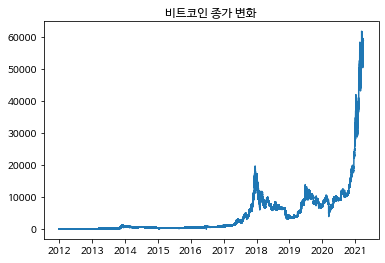

In [ ]:
plt.plot(bc['Date'],bc['Close'])
plt.title('비트코인 종가 변화')
plt.show()

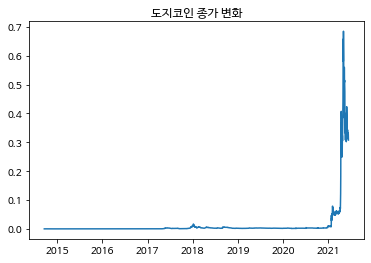

In [ ]:
plt.plot(dc['Date'], dc['Close'])
plt.title('도지코인 종가 변화')
plt.show()

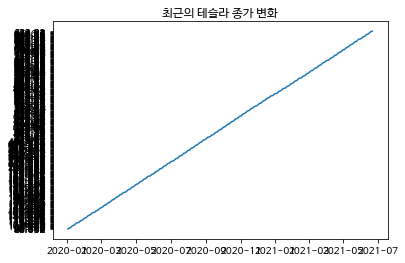

In [ ]:
plt.plot(tsla_aftr_2020['Date'], tsla_aftr_2020['Close'])
plt.title('최근의 테슬라 종가 변화')
plt.show()

- 비트코인은 2017년부터 증가하기 시작하여 2018년에 고점을 찍고 2019년까지 감소했다. 
 
 이후 다시 2020년에서 일정한 구간 내에서 왔다갔다하다가 2021년 가격이 급증했다.

- 도지코인은 2021년에 급증하였다.

- 테슬라 종가는 서서히 증가했다. 

 **-> 테슬라 종가에서 급격한 변화는 없었기 때문에 머스크의 트위터는 딱히 영향을 안 미쳤을 것이라고 해석했다.**

도지코인은 2021년 이후에 가격이 급증했기 때문에 2021년 이후의 데이터만 따로 처리하여 그래프를 그려보았다.

또한 비트코인도 머스크의 비트코인 관련 트윗이 올라오기 시작한 2020년 이후의 데이터를 처리하여 그래프를 그려보았다.

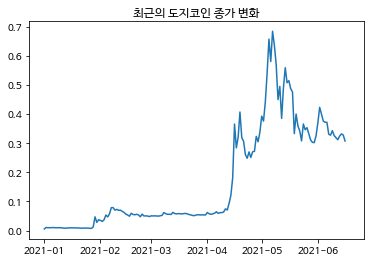

In [ ]:
dc_aftr_2021 = dc[dc['Date'] >= dt.date(2021,1,1)]
plt.plot(dc_aftr_2021['Date'], dc_aftr_2021['Close'])
plt.title('최근의 도지코인 종가 변화')
plt.show()

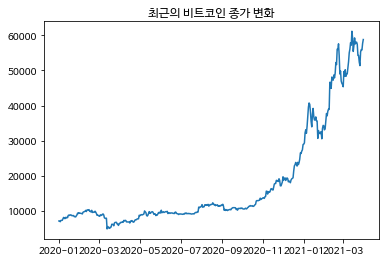

In [ ]:
plt.plot(bc_aftr_2020['Date'], bc_aftr_2020['Close'])
plt.title('최근의 비트코인 종가 변화')
plt.show()

비트코인과 도지코인 데이터 모두, 종가가 급증하거나 급감하는 지점들이 눈에 확인된다. 

일론 머스크의 코인 관련 발언들의 날짜에 해당하는 곳을 점을 찍어서 확인해보기로 했다.

In [ ]:
musk_bc[['Date','likes_count']]

,Date,likes_count
4095,2020-01-10,3073
4096,2020-01-10,119632
3061,2020-05-02,17434
3063,2020-05-02,5087
2798,2020-05-16,14939
2797,2020-05-16,9674
2207,2020-07-19,9374
1081,2020-11-17,66188
863,2020-12-20,140112
871,2020-12-20,239982


위에서 볼 수 있듯이 일론 머스크가 하루에 여러번 비트코인을 언급한 날도 있기 때문에 likes_count_bydate 라는 항목을 추가하여 여러번 올린 날은 해당 게시글들의 좋아요 수를 모두 합쳤다.

In [ ]:
musk_bc.value_counts('Date')

Date
2021-03-24    3
2021-02-19    2
2020-12-20    2
2020-05-16    2
2020-05-02    2
2020-01-10    2
2021-03-12    1
2020-11-17    1
2020-07-19    1
dtype: int64

In [ ]:
likes_count = []
musk_bc = musk_bc.reset_index()
for i in range(16):
  likes_count.append(musk_bc['likes_count'][i])
likes_count

[3073,
 119632,
 17434,
 5087,
 14939,
 9674,
 9374,
 66188,
 140112,
 239982,
 35319,
 27738,
 245163,
 141418,
 902515,
 179638]

In [ ]:
import numpy as np
likes_per_day_list = [likes_count[0] + likes_count[1], likes_count[2] + likes_count[3], likes_count[4] + likes_count[5], likes_count[6], likes_count[7], likes_count[8] + likes_count[9], likes_count[10] + likes_count[11], likes_count[12], likes_count[13] + likes_count[14] + likes_count[15]]
likes_per_day_np = np.array(likes_per_day_list)
likes_per_day_np

array([ 122705,   22521,   24613,    9374,   66188,  380094,   63057,
        245163, 1223571])

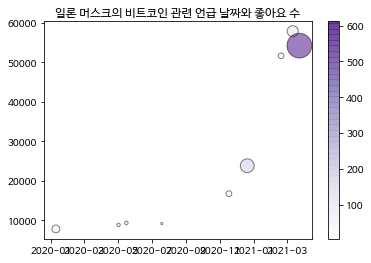

In [ ]:
date = musk_bc['Date']
bc_musktweeted = bc_aftr_2020[bc_aftr_2020['Date'].isin(date) == True]
plt.scatter(bc_musktweeted['Date'], bc_musktweeted['Close'], alpha = 0.5, s = likes_per_day_np/2000, c = likes_per_day_np/2000, cmap ='Purples', edgecolors = 'black' )
plt.colorbar()
plt.title('일론 머스크의 비트코인 관련 언급 날짜와 좋아요 수')
plt.show()

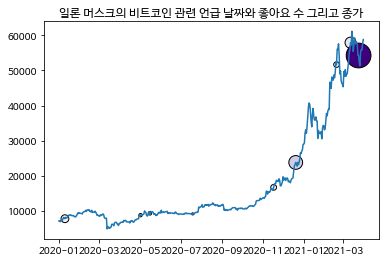

In [ ]:
plt.plot(bc_aftr_2020['Date'], bc_aftr_2020['Close'])
plt.scatter(bc_musktweeted['Date'], bc_musktweeted['Close'], c = likes_per_day_np, s = likes_per_day_np/2000, cmap ='Purples', edgecolors = 'black' )
plt.title('일론 머스크의 비트코인 관련 언급 날짜와 좋아요 수 그리고 종가')
plt.show()

2020년 초반 부분은 큰 관련이 없어 보였다. 따라서 2020년 7월 이후의 그래프를 확인해보았다.

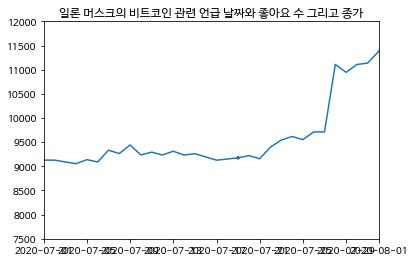

In [ ]:
plt.plot(bc_aftr_2020['Date'], bc_aftr_2020['Close'])
plt.scatter(bc_musktweeted['Date'], bc_musktweeted['Close'], c = likes_per_day_np, s = likes_per_day_np/2000, cmap ='Purples', edgecolors = 'black' )
plt.title('일론 머스크의 비트코인 관련 언급 날짜와 좋아요 수 그리고 종가')
plt.axis([dt.date(2020,7,1),dt.date(2020,8,1),7500,12000])
plt.show()

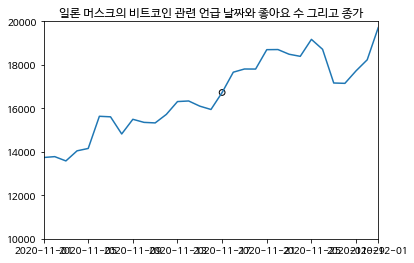

In [ ]:
plt.plot(bc_aftr_2020['Date'], bc_aftr_2020['Close'])
plt.scatter(bc_musktweeted['Date'], bc_musktweeted['Close'], c = likes_per_day_np, s = likes_per_day_np/2000, cmap ='Purples', edgecolors = 'black' )
plt.title('일론 머스크의 비트코인 관련 언급 날짜와 좋아요 수 그리고 종가')
plt.axis([dt.date(2020,11,1),dt.date(2020,12,1),10000,20000])
plt.show()

2020/7/19 2020/11/17의 비트코인 발언은 딱히 영향이 없었던 것 같다.

8    Bitcoin is almost as bs as fiat money
9                  Bitcoin is my safe word
Name: tweet, dtype: object


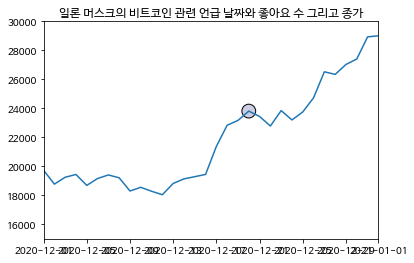

In [ ]:
plt.plot(bc_aftr_2020['Date'], bc_aftr_2020['Close'])
plt.scatter(bc_musktweeted['Date'], bc_musktweeted['Close'], c = likes_per_day_np, s = likes_per_day_np/2000, cmap ='Purples', edgecolors = 'black' )
plt.title('일론 머스크의 비트코인 관련 언급 날짜와 좋아요 수 그리고 종가')
plt.axis([dt.date(2020,12,1),dt.date(2021,1,1),15000,30000])
print(musk_bc[musk_bc['Date'] == dt.date(2020,12,20)]['tweet'])
plt.show()

2020/12/20

이 날 머스크의 트윗과 함께 비트코인이 떨어졌는데, 머스크의 '비트코인은 불환 지폐만큼 bull shxx이다'라는 비트코인을 까는 트윗을 올렸었다.

또한 비트코인에 꽂혔다라는 글도 올렸었는데, 관련 정보를 더 찾아보니 해당 글의 댓글에 '농담이다'라고 했다 한다.

결론적으로 이 날 비트코인을 까는 트윗을 작성했고, 비트코인이 미약하긴 하지만 떨어졌다.

10    @business To be clear, I am *not* an investor,...
11    @business Tesla’s action is not directly refle...
Name: tweet, dtype: object


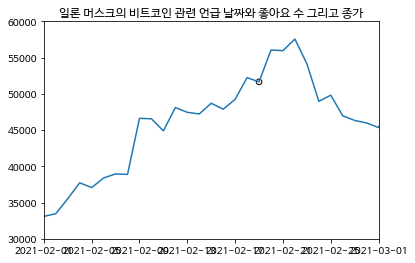

In [ ]:
plt.plot(bc_aftr_2020['Date'], bc_aftr_2020['Close'])
plt.scatter(bc_musktweeted['Date'], bc_musktweeted['Close'], c = likes_per_day_np, s = likes_per_day_np/2000, cmap ='Purples', edgecolors = 'black' )
plt.title('일론 머스크의 비트코인 관련 언급 날짜와 좋아요 수 그리고 종가')
plt.axis([dt.date(2021,2,1),dt.date(2021,3,1),30000,60000])
print(musk_bc[musk_bc['Date'] == dt.date(2021,2,19)]['tweet'])
plt.show()

2021/2/19

일론 머스크는 자신의 발언 중 하나인 '비트코인은 거의 불환 지폐만큼 bull shxx이다'의 핵심은 '거의'라는 트윗을 올렸다. 또한 '비트코인에 투자하는 것은 좋은 모험이다'라는 트윗도 같은 날에 올렸다.

그래프를 보면 비트코인 가격이 상승한 것을 볼 수 있다. 

12    BTC (Bitcoin) is an anagram of TBC(The Boring ...
Name: tweet, dtype: object


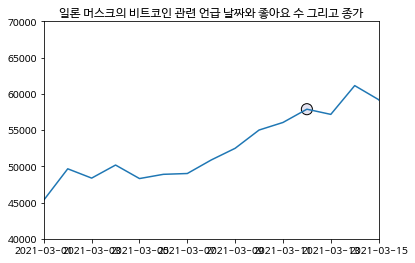

In [ ]:
plt.plot(bc_aftr_2020['Date'], bc_aftr_2020['Close'])
plt.scatter(bc_musktweeted['Date'], bc_musktweeted['Close'], c = likes_per_day_np, s = likes_per_day_np/2000, cmap ='Purples', edgecolors = 'black' )
plt.title('일론 머스크의 비트코인 관련 언급 날짜와 좋아요 수 그리고 종가')
plt.axis([dt.date(2021,3,1),dt.date(2021,3,15),40000,70000])
print(musk_bc[musk_bc['Date'] == dt.date(2021,3,12)]['tweet'])
plt.show()

2021/3/12
머스크는 '비트코인(BTC)는 지루한 기업(TBC: The Boring Company)의 순서를 뒤바꾼 것이다. 정말 우연의 일치네!'라는 별 의미 없는 농담 트윗을 올린다. 때문에 좋아요는 전보다 많이 받았지만 별로 영향을 주진 않은 것 같다.

13    Pay by Bitcoin capability available outside US...
14                 You can now buy a Tesla with Bitcoin
15    Tesla is using only internal &amp; open source...
Name: tweet, dtype: object


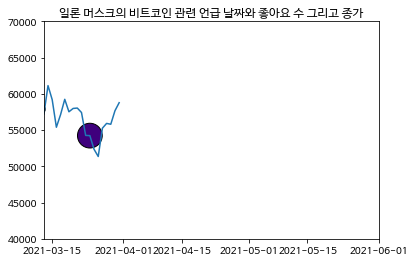

In [ ]:
plt.plot(bc_aftr_2020['Date'], bc_aftr_2020['Close'])
plt.scatter(bc_musktweeted['Date'], bc_musktweeted['Close'], c = likes_per_day_np, s = likes_per_day_np/2000, cmap ='Purples', edgecolors = 'black' )
plt.title('일론 머스크의 비트코인 관련 언급 날짜와 좋아요 수 그리고 종가')
plt.axis([dt.date(2021,3,13),dt.date(2021,6,1),40000,70000])
print(musk_bc[musk_bc['Date'] == dt.date(2021,3,24)]['tweet'])
plt.show()

2021/3/24
빠르게 그리고 꾸준히 하락 증세를 보이던 비트코인은, 머스크의 테슬라로 이제 비트코인을 살 수 있다 라는 언급으로 가격이 다시 오르기 시작했다. 비트코인 데이터는 4월 즈음의 데이터까지 밖에 없어서 추후의 양상은 확인하기 어려울 것 같다.

하지만 빠른 하락증세를 보이던 비트코인이 빠르게 상승했기 때문에 영향이 있다고 할 수 있을 것 같다.

그렇다면 도지코인은 어떤 영향을 받았을까? 똑같이 확인해보았다.

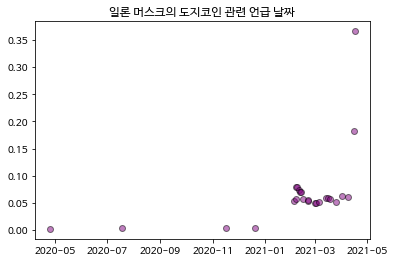

In [ ]:
date = musk_dc['Date']
dc_musktweeted = dc_aftr_2020[dc_aftr_2020['Date'].isin(date) == True]
plt.scatter(dc_musktweeted['Date'], dc_musktweeted['Close'], alpha = 0.5, color ='purple', edgecolors = 'black' )
plt.title('일론 머스크의 도지코인 관련 언급 날짜')
plt.show()

2021년 3월에 굉장히 많은 언급을 했음을 알 수 있다. 이제 이를 도지코인의 종가 그래프와 겹쳐보자.

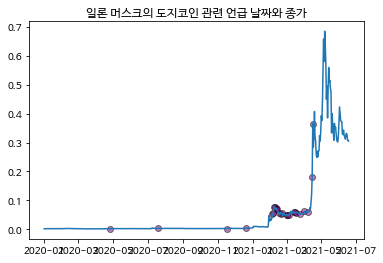

In [ ]:
plt.scatter(dc_musktweeted['Date'], dc_musktweeted['Close'], alpha = 0.5, color ='purple', edgecolors = 'black' )
plt.plot(dc_aftr_2020['Date'], dc_aftr_2020['Close'])
plt.title('일론 머스크의 도지코인 관련 언급 날짜와 종가')
plt.show()

끝의 3개의 점이 굉장히 큰 영향을 미친 것 같아서 따로 확인해주기로 했다.

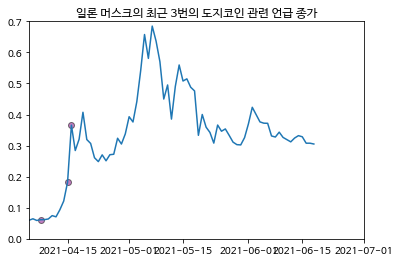

In [ ]:
plt.scatter(dc_musktweeted['Date'], dc_musktweeted['Close'], alpha = 0.5, color ='purple', edgecolors = 'black' )
plt.plot(dc_aftr_2020['Date'], dc_aftr_2020['Close'])
plt.axis([dt.date(2021,4,5),dt.date(2021,7,1),0,0.7])
plt.title('일론 머스크의 최근 3번의 도지코인 관련 언급 종가')
plt.show()

마지막에서 3번째의 점을 보면, 머스크의 발언이 도지코인의 급상승을 시작시켰음을 알 수 있고, 마지막에서 2번째의 점에서는 머스크의 발언이 이를 가속화 했음을, 마지막 발언에서는 급하락을 유발했다는 것을 알 수 있다. 이것만 봐도 굉장히 많은 영향을 미쳤다는 것을 금방 알 수 있지만, 3월 즈음의 수많은 도지 언급에 관한 부분도 확인해보기로 했다.

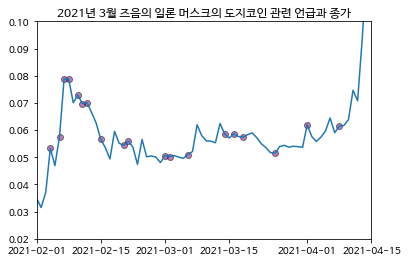

In [ ]:
plt.scatter(dc_musktweeted['Date'], dc_musktweeted['Close'], alpha = 0.5, color ='purple', edgecolors = 'black' )
plt.plot(dc_aftr_2020['Date'], dc_aftr_2020['Close'])
plt.axis([dt.date(2021,2,1),dt.date(2021,4,15),0.02,0.1])
plt.title('2021년 3월 즈음의 일론 머스크의 도지코인 관련 언급과 종가')
plt.show()

앞의 8개의 점들이 순서대로 하락, 상승, 상승 중지, 하락, 하락 중지, 하락 중지, 하락, 하락을 유도했음을 확인 했다. 

해당 날들의 머스크가 도지를 언급한 날에 종가의 증감이 변화하는 점들이 많다라는 점을 바탕으로 보았을 때 머스크의 발언이 자잘자잘하게 3월 부근에서 영향을 미쳤다고 할 수 있을 것 같다.

## 4. 결론
- 질문에 대한 답
- 알게된 점 등

일론 머스크의 코인 관련 언급은 테슬라 주식에는 큰 영향을 미치지 않은 것으로 보이며, 대신 코인에는 영향을 미친 부분이 확실히 있음을 확인했다. 2020년 초반부터 비트코인은 꾸준한 언급을 하였고, 2020년 중반 이후 부터 영향을 미쳤다. 그에 비해 도지코인은 2021년 초반부터 언급을 수많이 하기 시작했으며, 그로 인해 비트코인과 비교해 보았을 때에도 매우 큰 영향을 미쳤다. 확실히 영향력 있는 한 사람의 언급이 사회에 큰 영향을 미친다는 것을 알 수 있었던 것 같다. 이번 프로젝트를 통해 다양한 코드들과 그래프를 이용해 데이터를 분석하고 답을 얻어내는 과정에 대해 잘 학습할 수 있었던 것 같다.